In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Loading the Data
train_df = pd.read_csv("emnist-letters-train.csv")
test_df = pd.read_csv("emnist-letters-test.csv")

In [ ]:
y_train = train_df["23"]

In [ ]:
X_train = train_df.drop(train_df.columns[0], axis=1)

In [ ]:
y_test = test_df["1"]

In [ ]:
X_test = test_df.drop(test_df.columns[0], axis=1)

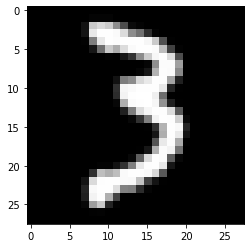

In [ ]:
z = np.array(X_train).reshape(X_train.shape[0],28,28)
plt.imshow(z[55,:,:],cmap='gray')

In [ ]:
class KNearestNeighbor:
    def __init__(self, k):
        self.k = k
        self.eps = 1e-8

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, num_loops=0):
        if num_loops == 0:
            distances = self.compute_distance_vectorized(X_test)
        return self.predict_labels(distances)

    def compute_distance_two_loops(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            for j in range(num_train):
                distances[i, j] = np.sqrt(self.eps + np.sum((X_test[i, :] - self.X_train[j, :]) ** 2))

        return distances

    def compute_distance_one_loop(self, X_test):
        
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            distances[i, :] = np.sqrt(self.eps + np.sum((self.X_train - X_test[i, :]) ** 2, axis=1))

        return distances

    def compute_distance_vectorized(self, X_test):
        
        X_test_squared = np.sum(X_test ** 2, axis=1, keepdims=True)
        X_train_squared = np.sum(self.X_train ** 2, axis=1, keepdims=True)
        two_X_test_X_train = np.dot(X_test, self.X_train.T)

        return np.sqrt(self.eps + X_test_squared - 2 * two_X_test_X_train + X_train_squared.T)

    def predict_labels(self, distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred
 

In [ ]:
KNN = KNearestNeighbor(k=1)
X = np.array(X_train)
y = np.array(y_train)
X_t = np.array(X_test)
y_t = np.array(y_test)

In [ ]:
KNN.train(X,y)
y_pred = KNN.predict(X_t, num_loops=0)
print(f"Accuracy: {sum(y_pred == y_t) / y_t.shape[0]}") # Prediction Accuracy

Accuracy: 0.7737684978714778
